# ARG CLASS IDENTIFIER
This script has two objectives: first, to parse the table generated by AAAA et al (2021), who classified ARGs in four classes by their risk. Said classification of ARGs can be found on the supplementary material of the paper, and it contains 4050 ARGs separated by tab in a table alongside a bunch of information that we can't make use of with our data. SO, to go back to the topic itself: first objetive, to parse said table and get out the columns with usable information. And, secondaly, using said useful information, see how many ARGs of each class can be found on our samples.

In [1]:
import pandas as pd
import numpy as np
import os
from met_brewer import met_brew

In [2]:
# Current wd: the script directory
print(os.getcwd())
os.chdir("../data/raw_data") # raw data directory, here's the table we need to parse
raw_dir = os.getcwd()
os.chdir("../clean_data") #clean data directory, here's our dataset
clean_dir = os.getcwd()
os.chdir("../../results/Class_res") # general results dir for these analysis
class_dir = os.getcwd()
print(os.getcwd())

/home/pak/Desktop/ARG-L/resistome/scripts
/home/pak/Desktop/ARG-L/resistome/results/Class_res


Let's start by parsing AAAAA et al database 

In [3]:
os.chdir(raw_dir)
raw_table = pd.read_table("Supplementary Data 4.txt", sep = "\t", header = 0)
raw_table

,ARG,Genotype,Phenotype,Enrichment,Mobility,ESKAPE_pathogen,Plasmid,Integron,Host_range,Human_associated_occ,Human_associated_abun,Enrichment_value,Rank
0,AAB20442,aminoglycoside__aac(3)-II,aminoglycoside,True,True,True,True,False,class,0.0470,0.001000,Human_only,I
1,YP_001966247,aminoglycoside__aac(3)-II,aminoglycoside,True,True,True,True,False,class,0.0840,0.004400,Human_only,I
2,NC_009838.1.5616796.p01,aminoglycoside__aac(3)-VI,aminoglycoside,True,True,True,True,False,family,0.0041,0.004200,322.544845,I
3,ABG77519,aminoglycoside__aac(6')-I,aminoglycoside,True,True,True,True,True,phylum,0.0690,0.004100,416.195466,I
4,AF231133.1.gene2.p01,aminoglycoside__aac(6')-I,aminoglycoside,True,True,True,True,False,phylum,0.0160,0.000390,Human_only,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DQ018711.1.gene7.p01,vancomycin__vanY,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.4700,0.004400,21.69590399,Unassessed
4046,FJ349556.1.gene4.p01,vancomycin__vanY,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.4900,0.005400,7.498609207,Unassessed
4047,AF155139.2.gene5.p01,vancomycin__vanZ,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.1400,0.002700,1.699360876,Unassessed
4048,CAB61225,vancomycin__vanZ,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.0020,0.000045,0.001356539,Unassessed


That's the full table. From it, we only care about two columns: 
- "Genotype", as it contains the ARG names in the same manner we've got them annotated
- "Rank", which is the value we want to add to our existing dataset
"Phenotype" may prove uselful as well, so we can keep it too.
The idea is to extract the info from RAnk by matching to Genotype. However, as it stands, the info in Genotype can not be used (it contains a duplicate of phenotype as well as the ARG name), so we need to separate both. Given how the structure of the duplicity is shared among all Genotype cells (i.e., in all of them its antibiotic name + underscore + underscore + SOMETIMES SOME EXTRA INFO DIVIDED BY UNDERSOCRE + gene name), we can use pd.split() to extract the name out

In [4]:
filtered_tab = raw_table[["Genotype", "Phenotype", "Rank"]]
filtered_tab

,Genotype,Phenotype,Rank
0,aminoglycoside__aac(3)-II,aminoglycoside,I
1,aminoglycoside__aac(3)-II,aminoglycoside,I
2,aminoglycoside__aac(3)-VI,aminoglycoside,I
3,aminoglycoside__aac(6')-I,aminoglycoside,I
4,aminoglycoside__aac(6')-I,aminoglycoside,I
...,...,...,...
4045,vancomycin__vanY,vancomycin,Unassessed
4046,vancomycin__vanY,vancomycin,Unassessed
4047,vancomycin__vanZ,vancomycin,Unassessed
4048,vancomycin__vanZ,vancomycin,Unassessed


In [5]:
filtered_tab["ARG_name"] = filtered_tab["Genotype"].str.split("_").str[-1] 
# I'm extracting the last element and only separating by a single "_" to deal with those cases in which there's extra info after the two initial "_"
filtered_tab = filtered_tab[["ARG_name", "Rank"]]
filtered_tab

/tmp/ipykernel_4446/2503804919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tab["ARG_name"] = filtered_tab["Genotype"].str.split("_").str[-1]


,ARG_name,Rank
0,aac(3)-II,I
1,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
4,aac(6')-I,I
...,...,...
4045,vanY,Unassessed
4046,vanY,Unassessed
4047,vanZ,Unassessed
4048,vanZ,Unassessed


We can now check some basic info about the dataset, such as which ARGs of which antibiotics it contains, what are the unique ARGs considered and how many ranks (there should be 5) there are

In [6]:
print(filtered_tab["ARG_name"].unique())
print("######################")
#print(filtered_tab["Phenotype"].unique())
print("######################")
print(filtered_tab["Rank"].unique())

['aac(3)-II' 'aac(3)-VI' "aac(6')-I" 'aadE' "ant(2'')-I" "aph(3')-I"
 "aph(3')-III" 'aph(6)-I'
 'bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase'
 'rmtF' 'rmtG' 'bacA' 'blaZ' 'class A beta-lactamase' 'CMY-111' 'CMY-4'
 'CMY-6' 'CTX-M' 'CTX-M-129' 'CTX-M-15' 'CTX-M-2' 'CTX-M-24' 'CTX-M-55'
 'GES-11' 'IMP-4' 'KPC-2' 'KPC-4' 'KPC-6' 'mecA' 'mecR1' 'NDM-5' 'NDM-6'
 'OXA-1' 'OXA-10' 'OXA-4' 'SHV' 'SHV-1' 'SHV-5' '156' '169' 'TEM-1'
 'VEB-3' 'VIM-1' 'VIM-2' 'chloramphenicol acetyltransferase' 'catA' 'catB'
 'chloramphenicol exporter' 'cmlA' 'floR' 'mcr1' 'fosB' 'fusB' 'ermB'
 'ermC' 'ermT' 'lnuA' 'lnuB' 'mphA' 'mphB' 'msrA'
 'EmrB-QacA family major facilitator transporter' 'mdtE' 'mdtL' 'mepA'
 'norA' 'TolC' 'qnrA' 'qnrB' 'qnrS' 'tetL' 'tetM' 'protein' 'dfrA1'
 'dfrA12' 'dfrA14' 'dfrA15' 'dfrA17' 'dfrA25' 'dfrA5' 'dfrB1'
 'DNA-binding transcriptional regulator gadX' 'histidine kinase' 'vanY'
 'aadA' "aph(2'')-Ie" "aph(3')-VII" 'CMY-2' 'OXA-72' 'penA' 'RO

There's a bunch of ARG names that are still badly annotated (i.e.: gene name preceded by a bunch of extra, space separated information). The easiest is to fix them by hand, as they are few in total. There's also a bunch of ARG names that have come out as just numbers: these are variations of the beta lactamases SHV, TEM and NDM. As I know them not to be present in the ARGs considered by the resistome chip, I won't do anything to fix them.

In [7]:
# Let's identify them first
for ARG in filtered_tab["ARG_name"].unique():
    if " " in ARG: print(ARG)

bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase
class A beta-lactamase
chloramphenicol acetyltransferase
chloramphenicol exporter
EmrB-QacA family major facilitator transporter
DNA-binding transcriptional regulator gadX
histidine kinase
streptomycin resistance protein
class B beta-lactamase
class C beta-lactamase
chloramphenicol and florfenicol resistance gene
kasugamycin resistance protein ksgA
antibiotic resistance rRNA adenine methyltransferase
cystathionine beta-lyase patB
viomycin phosphotransferase
bleomycin resistance protein
rifampin monooxygenase
16S rRNA methylase
bacterial regulatory protein LuxR
cAMP-regulatory protein
cob(I)alamin adenolsyltransferase
thiostrepton resistance methylase tsnR
transcriptional regulatory protein CpxR cpxR
truncated putative response regulator ArlR
response regulator EvgA


In [8]:
# As I see it, we can fix gadX, ksgA, patB, tsnR, cpxR, arlR and evgA. LuxR I know to be a fluorescent protein with no antibiotic resistance function
filtered_tab.loc[filtered_tab["ARG_name"] == "DNA-binding transcriptional regulator gadX", "ARG_name"] = "gadX"
filtered_tab.loc[filtered_tab["ARG_name"] == "kasugamycin resistance protein ksgA", "ARG_name"] = "ksgA"
filtered_tab.loc[filtered_tab["ARG_name"] == "cystathionine beta-lyase patB", "ARG_name"] = "patB"
filtered_tab.loc[filtered_tab["ARG_name"] == "thiostrepton resistance methylase tsnR", "ARG_name"] = "tsnR"
filtered_tab.loc[filtered_tab["ARG_name"] == "transcriptional regulatory protein CpxR cpxR", "ARG_name"] = "cpxR"
filtered_tab.loc[filtered_tab["ARG_name"] == "truncated putative response regulator ArlR", "ARG_name"] = "arlR"
filtered_tab.loc[filtered_tab["ARG_name"] == "response regulator EvgA", "ARG_name"] = "evgA"

# And let's check whether they remain
for ARG in filtered_tab["ARG_name"].unique():
    if " " in ARG: print(ARG)

bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase
class A beta-lactamase
chloramphenicol acetyltransferase
chloramphenicol exporter
EmrB-QacA family major facilitator transporter
histidine kinase
streptomycin resistance protein
class B beta-lactamase
class C beta-lactamase
chloramphenicol and florfenicol resistance gene
antibiotic resistance rRNA adenine methyltransferase
viomycin phosphotransferase
bleomycin resistance protein
rifampin monooxygenase
16S rRNA methylase
bacterial regulatory protein LuxR
cAMP-regulatory protein
cob(I)alamin adenolsyltransferase


In [9]:
# There's also a few extra names I've noticed to be annotated in a different manner as the SmartChip ARGs were, so I'm changing them for consistency sake
filtered_tab.loc[filtered_tab["ARG_name"] == "aph(3')-VII", "ARG_name"] ="aph3-viia"
filtered_tab.loc[filtered_tab["ARG_name"] == "GOB-1", "ARG_name"] ="blaGOB" #comes from beta-lactam_GOB-1
#filtered_tab["ARG_name"].unique()

And drop existing duplicates to simplify everything

In [10]:
print(filtered_tab.shape)
# Now, a note: I'm going to drop duplicates, as I have no way of knowing just by name which of the duplicated ARGs I have
# As there are proteins with identical names BUT different rank ORDERED FROM MOST DANGEROUS TO LEAST DANGEROUS, by doing this
# I will be overestimating the dangerousness of my data. If I were to keep the last, I will be underestimagin it. Compromises.
filtered_tab = filtered_tab.drop_duplicates(subset = ["ARG_name"], keep = "first")
print(filtered_tab.shape)
filtered_tab

(4050, 2)
(872, 2)


,ARG_name,Rank
0,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
7,aadE,I
9,ant(2'')-I,I
...,...,...
3952,dfrA24,Unassessed
3960,dfrB2,Unassessed
3962,methylase,Unassessed
3964,myrB,Unassessed


We should be able to add this extra information to what we already have by now

In [11]:
os.chdir(clean_dir)
filtered_tab.to_csv("rank_data.csv") #this will make accessing this data much faster if I need it in other analysis
resistome_data = pd.read_csv("ab_data_simple_fixed.csv", index_col = 0)
resistome_data

,Assay,antib,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_ab,log_n,rel_16
0,aacC2,Aminoglycoside,25.0,23.78,ardley,PUR,plastic,arg,9.246982,0.000222,-3.654,41686.938347
1,aacA/aphD,Aminoglycoside,25.0,26.05,ardley,PUR,plastic,arg,1.927525,0.000046,-4.335,41686.938347
2,aac(6')-II,Aminoglycoside,25.0,18.80,ardley,PUR,plastic,arg,288.403150,0.006918,-2.160,41686.938347
5,aac(6')-Ib,Aminoglycoside,25.0,15.27,ardley,PUR,plastic,arg,3303.695410,0.079250,-1.101,41686.938347
6,aadA2a,Aminoglycoside,25.0,17.66,ardley,PUR,plastic,arg,633.869711,0.015205,-1.818,41686.938347
...,...,...,...,...,...,...,...,...,...,...,...,...
10126,qepA_1_2,Fluoroquinolone,14.0,27.00,ion,water,control,arg,1.000000,0.000336,-3.474,2978.516429
10215,tetPA,Tetracycline,14.0,26.41,ion,water,control,arg,1.503142,0.000505,-3.297,2978.516429
10231,intI1F165_clinical,Integrase,14.0,25.19,ion,water,control,mge,3.491403,0.001172,-2.931,2978.516429
10240,czcA,MDR,14.0,21.77,ion,water,control,arg,37.068072,0.012445,-1.905,2978.516429


In [12]:
resistome_data.loc[resistome_data["Assay"].isin(["dfrA1", "dfrA12", "bacA"])]
resistome_data.loc[resistome_data["antib"] == "Other"]

,Assay,antib,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_ab,log_n,rel_16
180,dfrA1,Other,25.0,20.51,ardley,PUR,plastic,mge,88.511561,0.002123,-2.673,41686.938347
181,dfrA12,Other,25.0,17.26,ardley,PUR,plastic,mge,835.603018,0.020045,-1.698,41686.938347
182,nisB,Other,25.0,19.18,ardley,PUR,plastic,mge,221.819642,0.005321,-2.274,41686.938347
183,pmrA,Other,25.0,25.35,ardley,PUR,plastic,mge,3.126079,0.000075,-4.125,41686.938347
184,fosb,Other,25.0,19.16,ardley,PUR,plastic,mge,224.905461,0.005395,-2.268,41686.938347
...,...,...,...,...,...,...,...,...,...,...,...,...
3240,fosb,Other,21.0,20.31,ardley,soil,control,mge,101.624869,0.001079,-2.967,94188.959652
3242,Arr2,Other,21.0,19.13,ardley,soil,control,mge,229.614865,0.002438,-2.613,94188.959652
3244,bacA,Other,21.0,11.93,ardley,soil,control,mge,33189.445755,0.352371,-0.453,94188.959652
3245,fabK,Other,21.0,20.73,ardley,soil,control,mge,76.032628,0.000807,-3.093,94188.959652


In [13]:
# In order to make graphs consistent, I need to change some descriptive values in the resistome data
resistome_data.loc[resistome_data["type_g"] == "control", "type_g"] = "Surrounding \n environment"
resistome_data.loc[resistome_data["type_g"] == "plastic", "type_g"] = "Plastic"
resistome_data.loc[resistome_data["place"] == "ardley", "place"] = "Ardley"
resistome_data.loc[resistome_data["place"] == "ion", "place"] = "Lake \n Ionosférico"
resistome_data.loc[resistome_data["place"] == "uru", "place"] = "Lake \n Uruguay"

resistome_data.loc[resistome_data["antib"] == "Other", "or_seq"] = "arg"

resistome_data.loc[resistome_data["Assay"] == "dfrA1", "antib"] = "Trimethoprim"
resistome_data.loc[resistome_data["Assay"] == "dfrA12", "antib"] = "Trimethoprim"
resistome_data.loc[resistome_data["Assay"] == "dfrA1", "or_seq"] = "arg"
resistome_data.loc[resistome_data["Assay"] == "dfrA12", "or_seq"] = "arg"

In [14]:
# I'm going to work with .upper() string to fix possible problems with unmatching caps in the annotations on either side
it = 0
for chip_arg in [arg_nam.upper() for arg_nam in resistome_data.loc[resistome_data["or_seq"] == "arg"]["Assay"].unique()]:
    if chip_arg in [arg_nam.upper() for arg_nam in filtered_tab["ARG_name"].unique()]:
        it += 1
print(it)
it = 0
for chip_arg in [arg_nam.upper() for arg_nam in resistome_data["Assay"].unique()]:
    if chip_arg in [arg_nam.upper() for arg_nam in filtered_tab["ARG_name"].unique()]:
        it += 1
print(it)

77
77


In [15]:
filtered_tab.rename(columns = {"ARG_name": "Assay"}, inplace = True)
filtered_tab

/tmp/ipykernel_4446/2930149425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tab.rename(columns = {"ARG_name": "Assay"}, inplace = True)


,Assay,Rank
0,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
7,aadE,I
9,ant(2'')-I,I
...,...,...
3952,dfrA24,Unassessed
3960,dfrB2,Unassessed
3962,methylase,Unassessed
3964,myrB,Unassessed


In [16]:
os.chdir(class_dir)
full_df = resistome_data.join(filtered_tab.set_index("Assay"), on = "Assay")
print(full_df["Rank"].value_counts())
full_df["Rank"] = full_df["Rank"].fillna("Unassessed")
print(full_df["Rank"].value_counts())
full_df.to_csv("resistome_data_with_ranks.csv")
full_df

Rank
IV            200
III           102
I              96
Unassessed     46
II             13
Name: count, dtype: int64
Rank
Unassessed    2007
IV             200
III            102
I               96
II              13
Name: count, dtype: int64


,Assay,antib,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_ab,log_n,rel_16,Rank
0,aacC2,Aminoglycoside,25.0,23.78,Ardley,PUR,Plastic,arg,9.246982,0.000222,-3.654,41686.938347,Unassessed
1,aacA/aphD,Aminoglycoside,25.0,26.05,Ardley,PUR,Plastic,arg,1.927525,0.000046,-4.335,41686.938347,Unassessed
2,aac(6')-II,Aminoglycoside,25.0,18.80,Ardley,PUR,Plastic,arg,288.403150,0.006918,-2.160,41686.938347,IV
5,aac(6')-Ib,Aminoglycoside,25.0,15.27,Ardley,PUR,Plastic,arg,3303.695410,0.079250,-1.101,41686.938347,Unassessed
6,aadA2a,Aminoglycoside,25.0,17.66,Ardley,PUR,Plastic,arg,633.869711,0.015205,-1.818,41686.938347,Unassessed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,qepA_1_2,Fluoroquinolone,14.0,27.00,Lake \n Ionosférico,water,Surrounding \n environment,arg,1.000000,0.000336,-3.474,2978.516429,Unassessed
10215,tetPA,Tetracycline,14.0,26.41,Lake \n Ionosférico,water,Surrounding \n environment,arg,1.503142,0.000505,-3.297,2978.516429,Unassessed
10231,intI1F165_clinical,Integrase,14.0,25.19,Lake \n Ionosférico,water,Surrounding \n environment,mge,3.491403,0.001172,-2.931,2978.516429,Unassessed
10240,czcA,MDR,14.0,21.77,Lake \n Ionosférico,water,Surrounding \n environment,arg,37.068072,0.012445,-1.905,2978.516429,Unassessed


In [17]:
full_df["hacky"] = full_df["place"] + "\n" + full_df["type_g"]
#all_data.head()
lala = full_df.groupby(["place", "type_g", "hacky", "antib", "or_seq", "Assay", "Rank"])["rel_n"].mean().reset_index()
arg_counts = lala.loc[lala["or_seq"] == "arg"].groupby(["place", "type_g", "hacky"])["Rank"].value_counts().reset_index()
arg_counts

,place,type_g,hacky,Rank,count
0,Ardley,Plastic,Ardley\nPlastic,Unassessed,230
1,Ardley,Plastic,Ardley\nPlastic,IV,28
2,Ardley,Plastic,Ardley\nPlastic,I,16
3,Ardley,Plastic,Ardley\nPlastic,III,15
4,Ardley,Plastic,Ardley\nPlastic,II,3
5,Ardley,Surrounding \n environment,Ardley\nSurrounding \n environment,Unassessed,158
6,Ardley,Surrounding \n environment,Ardley\nSurrounding \n environment,IV,22
7,Ardley,Surrounding \n environment,Ardley\nSurrounding \n environment,I,11
8,Ardley,Surrounding \n environment,Ardley\nSurrounding \n environment,III,11
9,Ardley,Surrounding \n environment,Ardley\nSurrounding \n environment,II,2


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

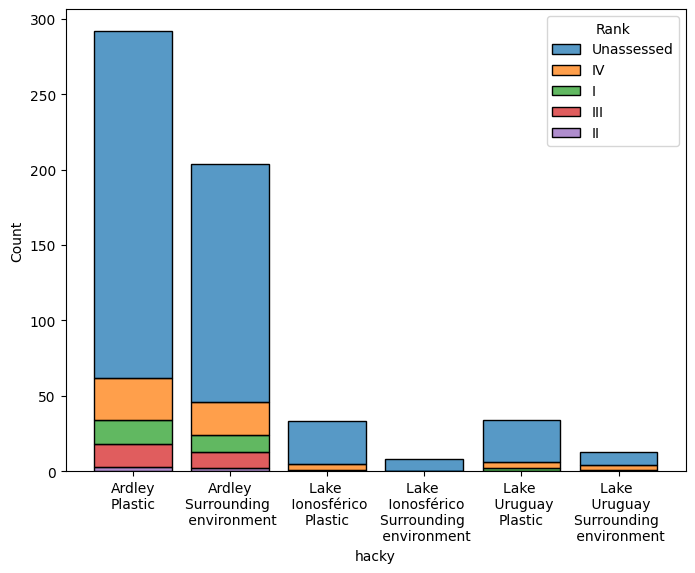

In [19]:
os.chdir(class_dir)
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.histplot(arg_counts, x = "hacky", hue = "Rank", weights = "count", multiple = "stack", shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
#plt.xticks(fontsize = )
#plt.tight_layout()
plt.savefig("rank_counts.png", bbox_inches = "tight")
lala.to_csv("rank_counts.csv")

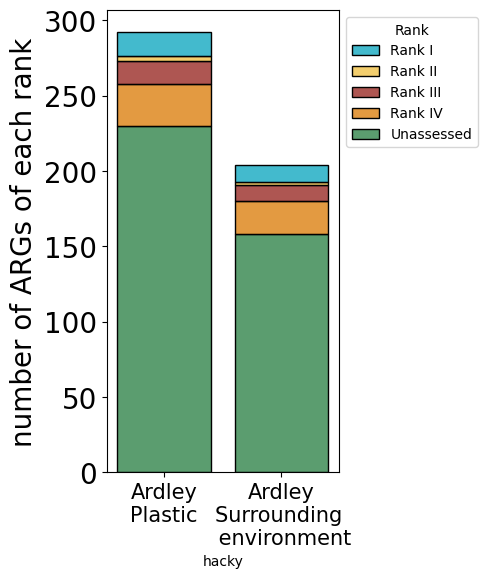

In [22]:
# Renaming stuff for clarity sake
ard_counts = arg_counts.loc[arg_counts["place"] == "Ardley"]

ard_counts.loc[ard_counts["Rank"] == "I", "Rank"] = "Rank I"
ard_counts.loc[ard_counts["Rank"] == "II", "Rank"] = "Rank II"
ard_counts.loc[ard_counts["Rank"] == "III", "Rank"] = "Rank III"
ard_counts.loc[ard_counts["Rank"] == "IV", "Rank"] = "Rank IV"

ard_counts = ard_counts.sort_values(by = "Rank")

colors = met_brew(name = "Lakota", n = 5, brew_type = "discrete")

fig, ax = plt.subplots(figsize = (3,6))
ax = sns.histplot(ard_counts, x = "hacky", hue = "Rank", weights = "count", multiple = "stack", shrink = 0.8, palette = colors)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
ax.set_ylabel("number of ARGs of each rank", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.savefig("rank_counts_ard.png", bbox_inches = "tight")

In [24]:
print(colors)

['#04a3bd', '#f0be3d', '#931e18', '#da7901', '#247d3f']


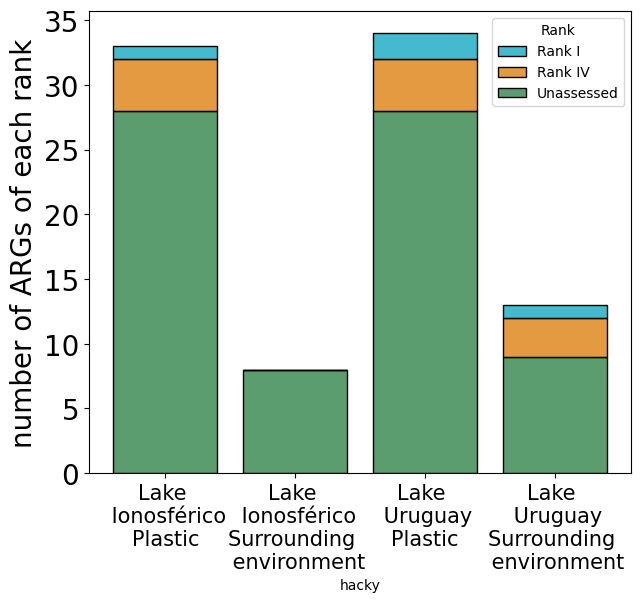

In [28]:
lake_counts = arg_counts.loc[(arg_counts["place"] == "Lake \n Ionosférico") | (arg_counts["place"] == "Lake \n Uruguay")]

lake_counts.loc[lake_counts["Rank"] == "I", "Rank"] = "Rank I"
lake_counts.loc[lake_counts["Rank"] == "II", "Rank"] = "Rank II"
lake_counts.loc[lake_counts["Rank"] == "III", "Rank"] = "Rank III"
lake_counts.loc[lake_counts["Rank"] == "IV", "Rank"] = "Rank IV"

#lake_counts = lake_counts.sort_values(by = "Rank")

colors = ['#04a3bd', # Rank I
 '#da7901', # Rank IV
 '#247d3f'] # Unassessed
           
fig, ax = plt.subplots(figsize = (7,6))
ax = sns.histplot(lake_counts, x = "hacky", hue = "Rank", weights = "count", multiple = "stack", shrink = 0.8, palette = colors,
                 hue_order = ["Rank I", "Rank IV", "Unassessed"])
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

ax.set_ylabel("number of ARGs of each rank", fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.savefig("rank_counts_lake.png", bbox_inches = "tight")

First question: **are there more different ARGs in plastics or in soils**

In [36]:
import scipy.stats as stat

In [39]:
total_counts = full_df.loc[full_df["or_seq"] == "arg"][["type_g", "place", "sample"]].value_counts().reset_index()
print(stat.shapiro(total_counts.loc[total_counts["type_g"] == "Plastic"]["count"]))
print(stat.shapiro(total_counts.loc[total_counts["type_g"] == "Surrounding \n environment"]["count"]))
print(stat.levene(total_counts.loc[total_counts["type_g"] == "Plastic"]["count"], 
                  total_counts.loc[total_counts["type_g"] == "Surrounding \n environment"]["count"]))
print(stat.mannwhitneyu(total_counts.loc[total_counts["type_g"] == "Plastic"]["count"], 
                     total_counts.loc[total_counts["type_g"] == "Surrounding \n environment"]["count"]))
total_counts

ShapiroResult(statistic=0.6700451993178069, pvalue=8.041730065251715e-05)
ShapiroResult(statistic=0.6410077289463153, pvalue=8.295055527822437e-05)
LeveneResult(statistic=1.6132435660832052, pvalue=0.21573109718471245)
MannwhitneyuResult(statistic=144.0, pvalue=0.00599661416579652)


,type_g,place,sample,count
0,Plastic,Ardley,22.0,247
1,Plastic,Ardley,24.0,244
2,Plastic,Ardley,25.0,238
3,Plastic,Ardley,23.0,237
4,Plastic,Ardley,27.0,231
5,Plastic,Ardley,26.0,216
6,Surrounding \n environment,Ardley,20.0,174
7,Surrounding \n environment,Ardley,19.0,137
8,Surrounding \n environment,Ardley,21.0,113
9,Plastic,Lake \n Ionosférico,17.0,23


Interpretation: while the number of ARGs varies from case to case, globally, we can't say that eithery sample typology has more or less differentiated ARGs than the other. 
ADDENDUM: if I'm calculating whether plastic samples have more or less differentiated ARGs on average, I should do the same with MGEs

In [40]:
total_mges = full_df.loc[full_df["or_seq"] == "mge"][["type_g", "place", "sample"]].value_counts().reset_index()
print(stat.shapiro(total_mges.loc[total_mges["type_g"] == "Plastic"]["count"]))
print(stat.shapiro(total_mges.loc[total_mges["type_g"] == "Surrounding \n environment"]["count"]))
print(stat.levene(total_mges.loc[total_mges["type_g"] == "Plastic"]["count"], 
                  total_mges.loc[total_mges["type_g"] == "Surrounding \n environment"]["count"]))
print(stat.mannwhitneyu(total_mges.loc[total_mges["type_g"] == "Plastic"]["count"], 
                     total_mges.loc[total_mges["type_g"] == "Surrounding \n environment"]["count"]))
total_counts

ShapiroResult(statistic=0.6840575677404221, pvalue=0.00011322445570666389)
ShapiroResult(statistic=0.6648183157097773, pvalue=0.0001660577261920214)
LeveneResult(statistic=2.596411770159779, pvalue=0.11966092955416197)
MannwhitneyuResult(statistic=134.0, pvalue=0.02284375049578263)


,type_g,place,sample,count
0,Plastic,Ardley,22.0,247
1,Plastic,Ardley,24.0,244
2,Plastic,Ardley,25.0,238
3,Plastic,Ardley,23.0,237
4,Plastic,Ardley,27.0,231
5,Plastic,Ardley,26.0,216
6,Surrounding \n environment,Ardley,20.0,174
7,Surrounding \n environment,Ardley,19.0,137
8,Surrounding \n environment,Ardley,21.0,113
9,Plastic,Lake \n Ionosférico,17.0,23



Next question: **¿are there differences when it comes down to the number of ARGs of an specific rank at the global level?**

Mind you, given the stark differences in the number of total ARGs found between sampling places, we need to re-think the question, as we cannot compare numbers of ARGs as is: the only differences found if we do so would be between lake and ardley samples. Thus, we can study **whether within the total of ARGs found in each sample type a specific rank is more or less represented**. Or, in other words, compare percentages. 
To do so, first we need to be able to obtain percentages 

In [44]:
global_counts = full_df.loc[full_df["or_seq"] == "arg"][["type_g", "place", "sample", "Rank"]].value_counts().reset_index()
rankI_counts = global_counts.loc[global_counts["Rank"] == "I"]
# By merging with total_counts we can easily compare the total of ARGs in a particular sample and the number of ARGs within that total that pertain to our rank of interest
rankI_counts = rankI_counts.merge(total_counts, on = "sample", how = "outer"  # we need to do the outer merge to not lose those samples in which there are no ARGs of the rank
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] #these columns are just duplicated, no value in them
                          ).fillna(0 #only zeroes are those of count_x, aka, those of the samples in which there are no ARGs of the rank we want
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankI_counts["rank_pct"] = (rankI_counts["rank_count"] / rankI_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankI_counts.loc[rankI_counts["type_g"] == "Plastic"]["rank_pct"]))
print(stat.shapiro(rankI_counts.loc[rankI_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.levene(rankI_counts.loc[rankI_counts["type_g"] == "Plastic"]["rank_pct"], 
                  rankI_counts.loc[rankI_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.mannwhitneyu(rankI_counts.loc[rankI_counts["type_g"] == "Plastic"]["rank_pct"], 
                     rankI_counts.loc[rankI_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
# Now I want to get the plastic and soil exclusive ARGs with rank I
print("PLASTIC EXCLUSIVES: ")
print(full_df.loc[(full_df["Rank"] == "I") & (full_df["type_g"] == "Plastic") & (full_df["or_seq"] == "arg")]["Assay"].unique())
print("SOIL EXCLUSIVES: ")
print(full_df.loc[(full_df["Rank"] == "I") & (full_df["type_g"] == "Surrounding \n environment") & (full_df["or_seq"] == "arg")]["Assay"].unique())
rankI_counts.head()


ShapiroResult(statistic=0.7720512452859521, pvalue=0.0011862650375944208)
ShapiroResult(statistic=0.5458290280208288, pvalue=5.460112612299735e-06)
LeveneResult(statistic=0.49912826949974953, pvalue=0.4864163026905661)
MannwhitneyuResult(statistic=113.0, pvalue=0.19965195449023931)
PLASTIC EXCLUSIVES: 
['aadE' 'mepA' 'dfrA1' 'dfrA12' 'bacA' 'norA' 'mphA' 'tetL' 'dfrA15'
 'dfrA25' 'floR' 'qnrA' 'lnuA' 'lnuB' 'tetM' 'mphB']
SOIL EXCLUSIVES: 
['aadE' 'mepA' 'bacA' 'norA' 'lnuB' 'tetL' 'dfrA15' 'dfrA25' 'floR' 'qnrA'
 'mphA']


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,Surrounding \n environment,Lake \n Uruguay,8,0.0
1,2.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
2,3.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
3,4.0,1.0,Surrounding \n environment,Lake \n Uruguay,4,25.0
4,5.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0


So, the interpretation: **rank I ARGs are not differentialy represented in plastic samples when compared to soil samples**. 
Lets see rank II

In [45]:
rankII_counts = global_counts.loc[global_counts["Rank"] == "II"]
# First, obtain the pcts
rankII_counts = rankII_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankII_counts["rank_pct"] = (rankII_counts["rank_count"] / rankII_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankII_counts.loc[rankII_counts["type_g"] == "Plastic"]["rank_pct"]))
print(stat.shapiro(rankII_counts.loc[rankII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.levene(rankII_counts.loc[rankII_counts["type_g"] == "Plastic"]["rank_pct"], 
                  rankII_counts.loc[rankII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.mannwhitneyu(rankII_counts.loc[rankII_counts["type_g"] == "Plastic"]["rank_pct"], 
                     rankII_counts.loc[rankII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
rankII_counts.head()

ShapiroResult(statistic=0.6688620639520984, pvalue=7.815502254995593e-05)
ShapiroResult(statistic=0.34499120525171123, pvalue=2.2434019096637374e-08)
LeveneResult(statistic=0.540058966107693, pvalue=0.4692463424636738)
MannwhitneyuResult(statistic=110.0, pvalue=0.16864919154158853)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,Surrounding \n environment,Lake \n Uruguay,8,0.0
1,2.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
2,3.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
3,4.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
4,5.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0


Once again, **rank II ARGs are not differentially represented in plastic samples**.
Let's go for rank III

In [47]:
rankIII_counts = global_counts.loc[global_counts["Rank"] == "III"]
# First, obtain the pcts
rankIII_counts = rankIII_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankIII_counts["rank_pct"] = (rankIII_counts["rank_count"] / rankIII_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankIII_counts.loc[rankIII_counts["type_g"] == "Plastic"]["rank_pct"]))
print(stat.shapiro(rankIII_counts.loc[rankIII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.levene(rankIII_counts.loc[rankIII_counts["type_g"] == "Plastic"]["rank_pct"], 
                  rankIII_counts.loc[rankIII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.mannwhitneyu(rankIII_counts.loc[rankIII_counts["type_g"] == "Plastic"]["rank_pct"], 
                     rankIII_counts.loc[rankIII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
rankIII_counts.head()

ShapiroResult(statistic=0.64862549108409, pvalue=4.8366848615733346e-05)
ShapiroResult(statistic=0.6196927026603787, pvalue=4.4770637724663e-05)
LeveneResult(statistic=0.5322938765053383, pvalue=0.4724251108211598)
MannwhitneyuResult(statistic=100.0, pvalue=0.4988878777221407)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,Surrounding \n environment,Lake \n Uruguay,8,0.0
1,2.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
2,3.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
3,4.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
4,5.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0


In [48]:
rankIV_counts = global_counts.loc[global_counts["Rank"] == "IV"]
# First, obtain the pcts
rankIV_counts = rankIV_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankIV_counts["rank_pct"] = (rankIV_counts["rank_count"] / rankIV_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankIV_counts.loc[rankIV_counts["type_g"] == "Plastic"]["rank_pct"]))
print(stat.shapiro(rankIV_counts.loc[rankII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.levene(rankIV_counts.loc[rankII_counts["type_g"] == "Plastic"]["rank_pct"], 
                  rankIV_counts.loc[rankII_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.mannwhitneyu(rankIV_counts.loc[rankIV_counts["type_g"] == "Plastic"]["rank_pct"], 
                     rankIV_counts.loc[rankIV_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
rankIV_counts.head()

ShapiroResult(statistic=0.8861561025693789, pvalue=0.04844465624368399)
ShapiroResult(statistic=0.7600698531767023, pvalue=0.0028138885275726215)
LeveneResult(statistic=3.0057277530036752, pvalue=0.09528864053490076)
MannwhitneyuResult(statistic=95.0, pvalue=0.7437464750176694)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,3.0,Surrounding \n environment,Lake \n Uruguay,8,37.5
1,2.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
2,3.0,1.0,Surrounding \n environment,Lake \n Uruguay,4,25.0
3,4.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0
4,5.0,0.0,Surrounding \n environment,Lake \n Uruguay,4,0.0


Still equal

In [49]:
rankU_counts = global_counts.loc[global_counts["Rank"] == "Unassessed"]
# First, obtain the pcts
rankU_counts = rankU_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankU_counts["rank_pct"] = (rankU_counts["rank_count"] / rankU_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankU_counts.loc[rankU_counts["type_g"] == "Plastic"]["rank_pct"]))
print(stat.shapiro(rankU_counts.loc[rankU_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.levene(rankU_counts.loc[rankU_counts["type_g"] == "Plastic"]["rank_pct"], 
                  rankU_counts.loc[rankU_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
print(stat.mannwhitneyu(rankU_counts.loc[rankU_counts["type_g"] == "Plastic"]["rank_pct"], 
                     rankU_counts.loc[rankU_counts["type_g"] == "Surrounding \n environment"]["rank_pct"]))
rankU_counts.head()

ShapiroResult(statistic=0.8693500364438513, pvalue=0.026580276321221074)
ShapiroResult(statistic=0.8020770326558723, pvalue=0.010018365046204923)
LeveneResult(statistic=3.7860821142412484, pvalue=0.06300572073487837)
MannwhitneyuResult(statistic=99.0, pvalue=0.6011235599180071)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,5,Surrounding \n environment,Lake \n Uruguay,8,62.5
1,2.0,4,Surrounding \n environment,Lake \n Uruguay,4,100.0
2,3.0,3,Surrounding \n environment,Lake \n Uruguay,4,75.0
3,4.0,3,Surrounding \n environment,Lake \n Uruguay,4,75.0
4,5.0,4,Surrounding \n environment,Lake \n Uruguay,4,100.0


## NCN of each rank
I will jump straight to studying the differences on a per sample type basis

In [52]:
full_df.loc[full_df["place"] == "Ardley", "grouping"] = "Ardley"
full_df.loc[full_df["place"] != "Ardley", "grouping"] = "Lakes"

ncn_df = full_df.groupby(["sample", "or_seq", "grouping", "type_g", "Rank"])["rel_ab"].sum().reset_index().sort_values(by = "grouping")
ncn_df["n_log2"] = ncn_df["rel_ab"] + 1
ncn_df["n_log2"] = np.log2(ncn_df["rel_ab"])
ncn_df.head()

,sample,or_seq,grouping,type_g,Rank,rel_ab,n_log2
50,19.0,arg,Ardley,Surrounding \n environment,I,0.657430,-0.605091
73,23.0,arg,Ardley,Plastic,II,0.416776,-1.262657
72,23.0,arg,Ardley,Plastic,I,1.769643,0.823459
71,22.0,mge,Ardley,Plastic,Unassessed,19.401943,4.278129
70,22.0,arg,Ardley,Plastic,Unassessed,20.860646,4.382712


Rank I NCN:

In [53]:
import scipy.stats as stats
import scikit_posthocs as sp

In [65]:
for ambient in ncn_df["grouping"].unique():
    print("Working on ", ambient.upper())
    ambient_samples = ncn_df.loc[ncn_df["grouping"] == ambient]
    var_lst = [group["rel_ab"] for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "I")].groupby("type_g")] #contains every group
    nam_lst = [name for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "I")].groupby("type_g")] #contains the name of everygroup, SAME ORDER
    print("Regular values: ", stats.levene(*var_lst))
    var_lst_ln = [group["n_log2"] for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "I")].groupby("type_g")]
    print("Log2: ", stats.levene(*var_lst_ln))
    fname = ambient.upper() + "-rankI_arg_group_statistics.txt"
    with open(fname, "w") as file:
        print("Regular_values: ", stats.levene(*var_lst), file = file)
        print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)
        print("Log2_values: ", stats.levene(*var_lst_ln), file = file)
        print("Log2_kruskal: ", stats.kruskal(*var_lst_ln), file = file)
    print(stats.kruskal(*var_lst))
    post_lolo = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
    post_lolo.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post_lolo.columns, nam_lst)},
                        index = {original_num:new_name for (original_num, new_name) in zip(post_lolo.index, nam_lst)},
                        inplace = True)

    fname = ambient.upper() + "-all_rankI_arg_comparisions.csv"
    post_lolo.to_csv(fname)
    print(post_lolo)

Working on  ARDLEY
Regular values:  LeveneResult(statistic=0.543813455359727, pvalue=0.4848359604625225)
Log2:  LeveneResult(statistic=0.021702609984979703, pvalue=0.8870343540026807)
KruskalResult(statistic=5.399999999999999, pvalue=0.020136751550346346)
                             Plastic  Surrounding \n environment
Plastic                     1.000000                    0.006603
Surrounding \n environment  0.006603                    1.000000
Working on  LAKES
Regular values:  LeveneResult(statistic=0.6386048253621084, pvalue=0.4826347658002697)
Log2:  LeveneResult(statistic=0.7432584269661904, pvalue=0.45202347319228087)
KruskalResult(statistic=2.0, pvalue=0.15729920705028105)
                            Plastic  Surrounding \n environment
Plastic                     1.00000                     0.18169
Surrounding \n environment  0.18169                     1.00000


In [64]:
var_lst = [group["rel_ab"] for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "I")].groupby(["grouping", "type_g"])] #contains every group
nam_lst = [name for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "I")].groupby(["grouping", "type_g"])]
print(stats.kruskal(*var_lst))
post_lolo = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post_lolo.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post_lolo.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post_lolo.index, nam_lst)},
                 inplace = True)
post_lolo.to_csv("all_rankI_comparisions.csv")
post_lolo

KruskalResult(statistic=11.600000000000001, pvalue=0.008886888805408628)


,"(Ardley, Plastic)","(Ardley, Surrounding \n environment)","(Lakes, Plastic)","(Lakes, Surrounding \n environment)"
"(Ardley, Plastic)",1.000000,0.005545,0.000027,0.005545
"(Ardley, Surrounding \n environment)",0.005545,1.000000,0.005545,0.294390
"(Lakes, Plastic)",0.000027,0.005545,1.000000,0.220330
"(Lakes, Surrounding \n environment)",0.005545,0.294390,0.220330,1.000000


Rank II

In [66]:
for ambient in ncn_df["grouping"].unique():
    print("Working on ", ambient.upper())
    ambient_samples = ncn_df.loc[ncn_df["grouping"] == ambient]
    var_lst = [group["rel_ab"] for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "II")].groupby("type_g")] #contains every group
    nam_lst = [name for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "II")].groupby("type_g")] #contains the name of everygroup, SAME ORDER
    print("Regular values: ", stats.levene(*var_lst))
    var_lst_ln = [group["n_log2"] for name, group in ambient_samples.loc[(ambient_samples["or_seq"] == "arg") & (ambient_samples["Rank"] == "II")].groupby("type_g")]
    print("Log2: ", stats.levene(*var_lst_ln))
    fname = ambient.upper() + "-rankII_arg_group_statistics.txt"
    with open(fname, "w") as file:
        print("Regular_values: ", stats.levene(*var_lst), file = file)
        print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)
        print("Log2_values: ", stats.levene(*var_lst_ln), file = file)
        print("Log2_kruskal: ", stats.kruskal(*var_lst_ln), file = file)
    print(stats.kruskal(*var_lst))
    post_lolo = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
    post_lolo.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post_lolo.columns, nam_lst)},
                        index = {original_num:new_name for (original_num, new_name) in zip(post_lolo.index, nam_lst)},
                        inplace = True)

    fname = ambient.upper() + "-all_rankII_arg_comparisions.csv"
    post_lolo.to_csv(fname)
    print(post_lolo)

Working on  ARDLEY
Regular values:  LeveneResult(statistic=3.36610298410702, pvalue=0.12600451242811458)
Log2:  LeveneResult(statistic=0.34446846704880524, pvalue=0.5827600491432394)
KruskalResult(statistic=1.0, pvalue=0.31731050786291115)
                             Plastic  Surrounding \n environment
Plastic                     1.000000                    0.363217
Surrounding \n environment  0.363217                    1.000000
Working on  LAKES


ValueError: Must enter at least two input sample vectors.

In [67]:
var_lst = [group["rel_ab"] for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "II")].groupby(["grouping", "type_g"])] #contains every group
nam_lst = [name for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "II")].groupby(["grouping", "type_g"])]

print(stats.kruskal(*var_lst))
post_lolo = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post_lolo.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post_lolo.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post_lolo.index, nam_lst)},
                 inplace = True)
post_lolo.to_csv("all_rankII_comparisions.csv")
post_lolo

KruskalResult(statistic=1.0, pvalue=0.31731050786291115)


,"(Ardley, Plastic)","(Ardley, Surrounding \n environment)"
"(Ardley, Plastic)",1.000000,0.363217
"(Ardley, Surrounding \n environment)",0.363217,1.000000


And now, graphs

In [68]:
import seaborn as sns

In [69]:
ncn_df["hacky"] = ncn_df["grouping"] + "" + ncn_df["type_g"]

rankI_ncn = ncn_df.loc[ncn_df["Rank"] == "I"]
rankII_ncn = ncn_df.loc[ncn_df["Rank"] == "II"]
rankIII_ncn = ncn_df.loc[ncn_df["Rank"] == "III"]
rankIV_ncn = ncn_df.loc[ncn_df["Rank"] == "IV"]
rankU_ncn = ncn_df.loc[ncn_df["Rank"] == "Unassessed"]

/tmp/ipykernel_11312/909842902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankI_ncn.sort_values(by = "type_g", inplace = True)


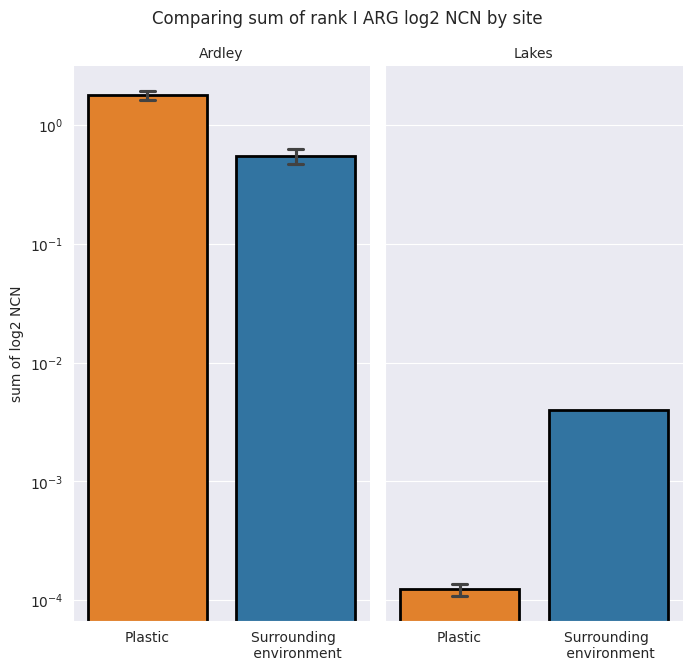

In [79]:
rankI_ncn.sort_values(by = "type_g", inplace = True)
with sns.axes_style("darkgrid"):
    cat = sns.catplot(data = rankI_ncn, kind="bar",
                      x="type_g", y="rel_ab", col="grouping",
                      height=7, aspect=0.5,
                      errorbar = "se", capsize = 0.1, ecolor = "black", hue = "type_g",
                      hue_order = ["Surrounding \n environment", "Plastic"],
                      fill = True,  edgecolor = "black", linewidth = 2 
                    )
    cat.fig.subplots_adjust(top=0.9)
    cat.fig.suptitle('Comparing sum of rank I ARG log2 NCN by site')
    cat.set_xlabels("")
    cat.set_ylabels("sum of log2 NCN")
    plt.yscale("log")
    cat.set_titles("{col_name}")
    #cat.set_xticklabels(rotation=30)

plt.savefig("Site separated rank I ARG log2 NCN.png", bbox_inches= "tight")

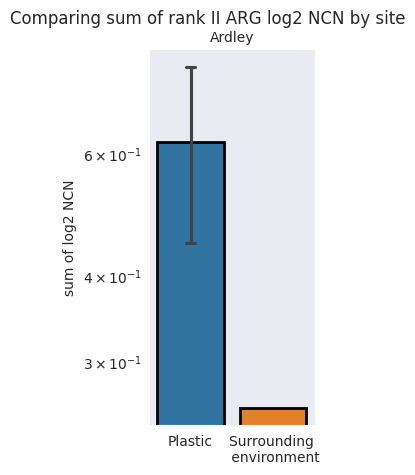

In [77]:
#sns.set(rc={"figure.figsize":(3, 4)}) #width=3, #height=4
with sns.axes_style("darkgrid"):
    cat = sns.catplot(data = rankII_ncn, kind="bar",
                      x="type_g", y="rel_ab", col="grouping",
                      height=5, aspect=0.5,
                      errorbar = "se", capsize = 0.1, ecolor = "black", hue = "type_g",
                      fill = True,  edgecolor = "black", linewidth = 2 
                    )
    cat.fig.subplots_adjust(top=0.9)
    cat.fig.suptitle('Comparing sum of rank II ARG log2 NCN by site')
    cat.set_xlabels("")
    cat.set_ylabels("sum of log2 NCN")
    plt.yscale("log")
    cat.set_titles("{col_name}")
    #cat.set_xticklabels(rotation=30)

plt.savefig("Site separated rank II ARG log2 NCN.png", bbox_inches= "tight")

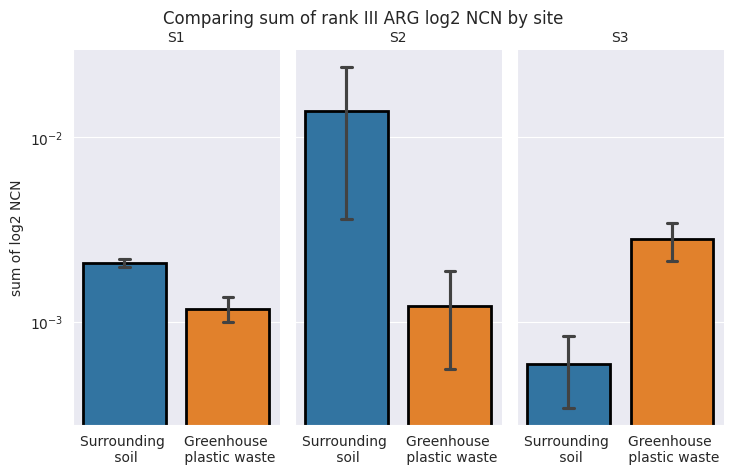

In [49]:
with sns.axes_style("darkgrid"):
    cat = sns.catplot(data = rankIII_ncn, kind="bar",
                      x="type_g", y="rel_ab", col="place",
                      height=5, aspect=0.5,
                      errorbar = "se", capsize = 0.1, ecolor = "black", hue = "type_g",
                      fill = True,  edgecolor = "black", linewidth = 2 
                    )
    cat.fig.subplots_adjust(top=0.9)
    cat.fig.suptitle('Comparing sum of rank III ARG log2 NCN by site')
    cat.set_xlabels("")
    cat.set_ylabels("sum of log2 NCN")
    plt.yscale("log")
    cat.set_titles("{col_name}")
    #cat.set_xticklabels(rotation=30)

plt.savefig("Site separated rank III ARG log2 NCN.png", bbox_inches= "tight")

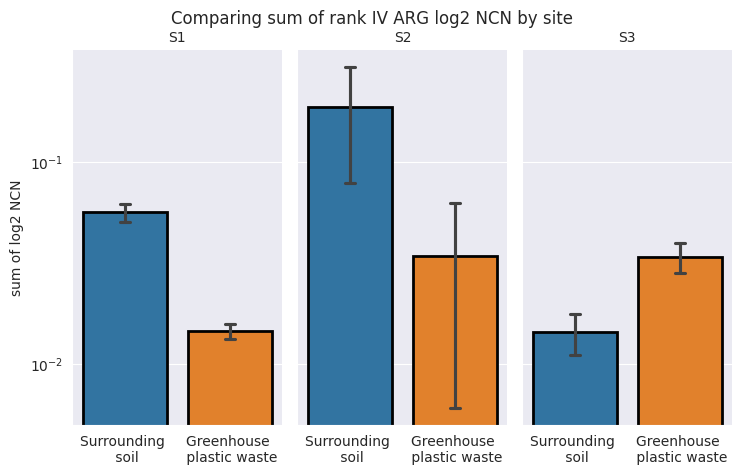

In [50]:
with sns.axes_style("darkgrid"):
    cat = sns.catplot(data = rankIV_ncn, kind="bar",
                      x="type_g", y="rel_ab", col="place",
                      height=5, aspect=0.5,
                      errorbar = "se", capsize = 0.1, ecolor = "black", hue = "type_g",
                      fill = True,  edgecolor = "black", linewidth = 2 
                    )
    cat.fig.subplots_adjust(top=0.9)
    cat.fig.suptitle('Comparing sum of rank IV ARG log2 NCN by site')
    cat.set_xlabels("")
    cat.set_ylabels("sum of log2 NCN")
    plt.yscale("log")
    cat.set_titles("{col_name}")
    #cat.set_xticklabels(rotation=30)

plt.savefig("Site separated rank IV ARG log2 NCN.png", bbox_inches= "tight")

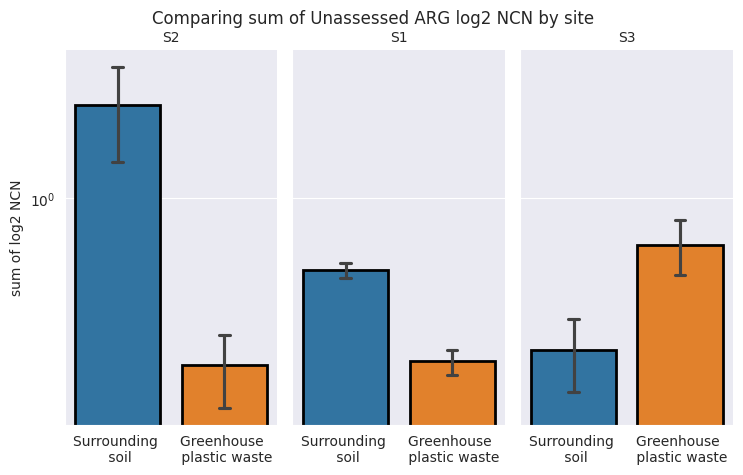

In [51]:
rankU_ncn = rankU_ncn.sort_values(by = "place")
rankU_ncn = rankU_ncn.sort_values(by = "type_g", ascending = False)

with sns.axes_style("darkgrid"):
    cat = sns.catplot(data = rankU_ncn, kind="bar",
                      x="type_g", y="rel_ab", col="place",
                      height=5, aspect=0.5,
                      errorbar = "se", capsize = 0.1, ecolor = "black", hue = "type_g",
                      fill = True,  edgecolor = "black", linewidth = 2 
                    )
    cat.fig.subplots_adjust(top=0.9)
    cat.fig.suptitle('Comparing sum of Unassessed ARG log2 NCN by site')
    cat.set_xlabels("")
    cat.set_ylabels("sum of log2 NCN")
    plt.yscale("log")
    cat.set_titles("{col_name}")
    #cat.set_xticklabels(rotation=30)

plt.savefig("Site separated Unassessed ARG log2 NCN.png", bbox_inches= "tight")

Lastly, I'll study the percentage of ARG copies (the percentage of the NCN of each sample type) made up by each rank

In [52]:
var_lst_total = [group["rel_ab"].sum() for name, group in ncn_df.loc[ncn_df["or_seq"] == "arg"].groupby(["sample", "place", "type_g"])] #contains every SAMPLE
var_lst_I = [group["rel_ab"].sum() for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "I")].groupby(["sample", "place", "type_g"])] 
var_lst_II = [group["rel_ab"].sum() for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "II")].groupby(["sample", "place", "type_g"])]
var_lst_III = [group["rel_ab"].sum() for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "III")].groupby(["sample", "place", "type_g"])]
var_lst_IV = [group["rel_ab"].sum() for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "IV")].groupby(["sample", "place", "type_g"])]
var_lst_U = [group["rel_ab"].sum() for name, group in ncn_df.loc[(ncn_df["or_seq"] == "arg") & (ncn_df["Rank"] == "Unassessed")].groupby(["sample", "place", "type_g"])]
nam_lst = [name for name, group in ncn_df.loc[ncn_df["or_seq"] == "arg"].groupby(["sample", "place", "type_g"])] 

totals_df = pd.DataFrame([nam_lst, var_lst_total, var_lst_I, var_lst_II, var_lst_III, var_lst_IV, var_lst_U]).T
totals_df.columns = ["st", "total", "rankI", "rankII", "rankIII", "rankIV", "rankU"]
totals_df["1_pct"] = (totals_df["rankI"] / totals_df["total"]) * 100
totals_df["2_pct"] = (totals_df["rankII"] / totals_df["total"]) * 100
totals_df["3_pct"] = (totals_df["rankIII"] / totals_df["total"]) * 100
totals_df["4_pct"] = (totals_df["rankIV"] / totals_df["total"]) * 100
totals_df["U_pct"] = (totals_df["rankU"] / totals_df["total"]) * 100

totals_df.fillna(0, inplace = True)
# split the names
totals_df[["sample", "place", "type_g"]] = pd.DataFrame(totals_df.st.tolist(), index= totals_df.index)
pcts_df = totals_df[["place", "type_g", "1_pct", "2_pct", "3_pct", "4_pct", "U_pct"]]
del totals_df
pcts_df

/tmp/ipykernel_3518/1050948933.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  totals_df.fillna(0, inplace = True)


,place,type_g,1_pct,2_pct,3_pct,4_pct,U_pct
0,S3,Surrounding \n soil,4.717576,0.972145,0.119487,3.065784,91.125008
1,S3,Surrounding \n soil,0.712311,0.832893,0.053473,3.252985,95.148338
2,S3,Surrounding \n soil,4.661576,0.824470,0.172402,3.166468,91.175083
3,S3,Greenhouse \n plastic waste,8.792109,1.288631,0.279721,3.913003,85.726536
4,S3,Greenhouse \n plastic waste,8.549852,1.262671,0.170725,2.595694,87.421057
5,S3,Greenhouse \n plastic waste,8.752504,1.545774,0.261991,2.429621,87.010109
6,S2,Surrounding \n soil,6.493535,0.569401,0.551769,6.835243,85.550052
7,S2,Surrounding \n soil,9.226571,2.512370,0.487076,5.691734,82.08225
8,S2,Surrounding \n soil,9.471268,2.527303,0.186476,5.652745,82.162209
9,S2,Greenhouse \n plastic waste,7.12057,5.277261,0.338734,5.508507,81.754927


And repeat the tests, this time with NCN pcts instead of NCN as is

In [53]:
var_lst = [group["1_pct"] for name, group in pcts_df.groupby(["place", "type_g"])]
nam_lst = [name for name, group in pcts_df.groupby(["place", "type_g"])] 
print("Regular values: ", stats.levene(*var_lst))
with open("rankI_pct_stats.txt", "w") as file:
    print("Regular_values: ", stats.levene(*var_lst), file = file)
    print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)

Regular values:  LeveneResult(statistic=0.4222314748622583, pvalue=0.8245860008037857)


In [54]:
print(stats.kruskal(*var_lst))
post = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post.index, nam_lst)},
                 inplace = True)
post.to_csv("rankI_pct_posthocs.csv")
post

KruskalResult(statistic=12.32163742690058, pvalue=0.030636730928582576)


,"(S1, Greenhouse \n plastic waste)","(S1, Surrounding \n soil)","(S2, Greenhouse \n plastic waste)","(S2, Surrounding \n soil)","(S3, Greenhouse \n plastic waste)","(S3, Surrounding \n soil)"
"(S1, Greenhouse \n plastic waste)",1.000000,0.014939,0.111384,0.082022,0.076554,0.332959
"(S1, Surrounding \n soil)",0.014939,1.000000,0.278950,0.332959,0.364951,0.006769
"(S2, Greenhouse \n plastic waste)",0.111384,0.278950,1.000000,0.868537,0.830425,0.018784
"(S2, Surrounding \n soil)",0.082022,0.332959,0.868537,1.000000,0.904550,0.014939
"(S3, Greenhouse \n plastic waste)",0.076554,0.364951,0.830425,0.904550,1.000000,0.014939
"(S3, Surrounding \n soil)",0.332959,0.006769,0.018784,0.014939,0.014939,1.000000


In [55]:
var_lst = [group["2_pct"] for name, group in pcts_df.groupby(["place", "type_g"])]
nam_lst = [name for name, group in pcts_df.groupby(["place", "type_g"])] 
print("Regular values: ", stats.levene(*var_lst))
with open("rankII_pct_stats.txt", "w") as file:
    print("Regular_values: ", stats.levene(*var_lst), file = file)
    print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)

Regular values:  LeveneResult(statistic=1.055048603637038, pvalue=0.43085895250406286)


In [56]:
print(stats.kruskal(*var_lst))
post = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post.index, nam_lst)},
                 inplace = True)
post.to_csv("rankII_pct_posthocs.csv")
post

KruskalResult(statistic=2.8479532163742576, pvalue=0.7234130206181956)


,"(S1, Greenhouse \n plastic waste)","(S1, Surrounding \n soil)","(S2, Greenhouse \n plastic waste)","(S2, Surrounding \n soil)","(S3, Greenhouse \n plastic waste)","(S3, Surrounding \n soil)"
"(S1, Greenhouse \n plastic waste)",1.000000,0.890336,0.890336,0.890336,0.890336,0.890336
"(S1, Surrounding \n soil)",0.890336,1.000000,0.890336,0.890336,0.890336,0.890336
"(S2, Greenhouse \n plastic waste)",0.890336,0.890336,1.000000,0.890336,0.890336,0.890336
"(S2, Surrounding \n soil)",0.890336,0.890336,0.890336,1.000000,0.890336,0.890336
"(S3, Greenhouse \n plastic waste)",0.890336,0.890336,0.890336,0.890336,1.000000,0.890336
"(S3, Surrounding \n soil)",0.890336,0.890336,0.890336,0.890336,0.890336,1.000000


In [57]:
var_lst = [group["3_pct"] for name, group in pcts_df.groupby(["place", "type_g"])]
nam_lst = [name for name, group in pcts_df.groupby(["place", "type_g"])] 
print("Regular values: ", stats.levene(*var_lst))
with open("rankIII_pct_stats.txt", "w") as file:
    print("Regular_values: ", stats.levene(*var_lst), file = file)
    print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)

Regular values:  LeveneResult(statistic=0.520359248525249, pvalue=0.7565524606101228)


In [58]:
print(stats.kruskal(*var_lst))
post = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post.index, nam_lst)},
                 inplace = True)
post.to_csv("rankIII_pct_posthocs.csv")
post

KruskalResult(statistic=11.245614035087712, pvalue=0.04672188105597348)


,"(S1, Greenhouse \n plastic waste)","(S1, Surrounding \n soil)","(S2, Greenhouse \n plastic waste)","(S2, Surrounding \n soil)","(S3, Greenhouse \n plastic waste)","(S3, Surrounding \n soil)"
"(S1, Greenhouse \n plastic waste)",1.000000,0.294439,0.828912,0.799431,0.095286,0.025214
"(S1, Surrounding \n soil)",0.294439,1.000000,0.231601,0.396965,0.424873,0.118492
"(S2, Greenhouse \n plastic waste)",0.828912,0.231601,1.000000,0.681895,0.079369,0.025214
"(S2, Surrounding \n soil)",0.799431,0.396965,0.681895,1.000000,0.123706,0.030953
"(S3, Greenhouse \n plastic waste)",0.095286,0.424873,0.079369,0.123706,1.000000,0.371738
"(S3, Surrounding \n soil)",0.025214,0.118492,0.025214,0.030953,0.371738,1.000000


In [59]:
var_lst = [group["4_pct"] for name, group in pcts_df.groupby(["place", "type_g"])]
nam_lst = [name for name, group in pcts_df.groupby(["place", "type_g"])] 
print("Regular values: ", stats.levene(*var_lst))
with open("rankIV_pct_stats.txt", "w") as file:
    print("Regular_values: ", stats.levene(*var_lst), file = file)
    print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)

Regular values:  LeveneResult(statistic=0.923562831692749, pvalue=0.49872233737345373)


In [60]:
print(stats.kruskal(*var_lst))
post = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post.index, nam_lst)},
                 inplace = True)
post.to_csv("rankIV_pct_posthocs.csv")
post

KruskalResult(statistic=14.380116959064324, pvalue=0.01336689160609581)


,"(S1, Greenhouse \n plastic waste)","(S1, Surrounding \n soil)","(S2, Greenhouse \n plastic waste)","(S2, Surrounding \n soil)","(S3, Greenhouse \n plastic waste)","(S3, Surrounding \n soil)"
"(S1, Greenhouse \n plastic waste)",1.000000,0.007804,0.074708,0.050529,0.042079,0.074708
"(S1, Surrounding \n soil)",0.007804,1.000000,0.208123,0.316473,0.000668,0.000711
"(S2, Greenhouse \n plastic waste)",0.074708,0.208123,1.000000,0.749060,0.001782,0.002792
"(S2, Surrounding \n soil)",0.050529,0.316473,0.749060,1.000000,0.001368,0.001889
"(S3, Greenhouse \n plastic waste)",0.042079,0.000668,0.001782,0.001368,1.000000,0.677453
"(S3, Surrounding \n soil)",0.074708,0.000711,0.002792,0.001889,0.677453,1.000000


In [61]:
var_lst = [group["U_pct"] for name, group in pcts_df.groupby(["place", "type_g"])]
nam_lst = [name for name, group in pcts_df.groupby(["place", "type_g"])] 
print("Regular values: ", stats.levene(*var_lst))
with open("rankU_pct_stats.txt", "w") as file:
    print("Regular_values: ", stats.levene(*var_lst), file = file)
    print("Regular_kruskal: ", stats.kruskal(*var_lst), file = file)

Regular values:  LeveneResult(statistic=0.772007617573904, pvalue=0.58782979516198)


In [62]:
print(stats.kruskal(*var_lst))
post = sp.posthoc_conover(var_lst, p_adjust = "fdr_bh")
post.rename(columns = {original_num:new_name for (original_num, new_name) in zip(post.columns, nam_lst)},
                 index = {original_num:new_name for (original_num, new_name) in zip(post.index, nam_lst)},
                 inplace = True)
post.to_csv("rankU_pct_posthocs.csv")
post

KruskalResult(statistic=14.380116959064324, pvalue=0.01336689160609581)


,"(S1, Greenhouse \n plastic waste)","(S1, Surrounding \n soil)","(S2, Greenhouse \n plastic waste)","(S2, Surrounding \n soil)","(S3, Greenhouse \n plastic waste)","(S3, Surrounding \n soil)"
"(S1, Greenhouse \n plastic waste)",1.000000,0.015046,0.015046,0.159557,0.178391,0.015046
"(S1, Surrounding \n soil)",0.015046,1.000000,0.872720,0.159557,0.001782,0.000334
"(S2, Greenhouse \n plastic waste)",0.015046,0.872720,1.000000,0.178391,0.001889,0.000334
"(S2, Surrounding \n soil)",0.159557,0.159557,0.178391,1.000000,0.015046,0.001782
"(S3, Greenhouse \n plastic waste)",0.178391,0.001782,0.001889,0.015046,1.000000,0.159557
"(S3, Surrounding \n soil)",0.015046,0.000334,0.000334,0.001782,0.159557,1.000000
